In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1 + 2*x - 2*x**2

### Did you know?


**You can solve linear regression in 3 lines of code. There is an inbuilt function in numpy called
linalg that SAVES LIVES (of Statisticians atleast).**


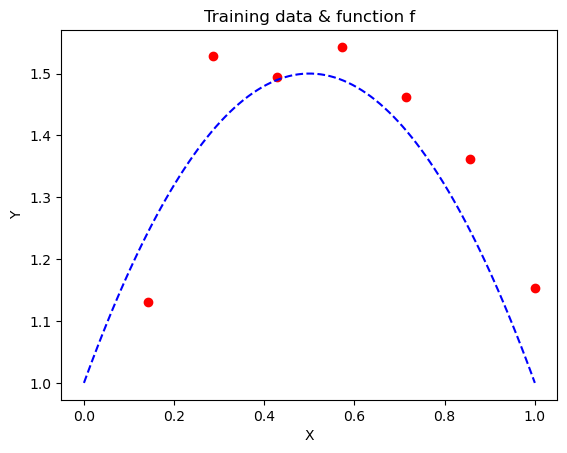

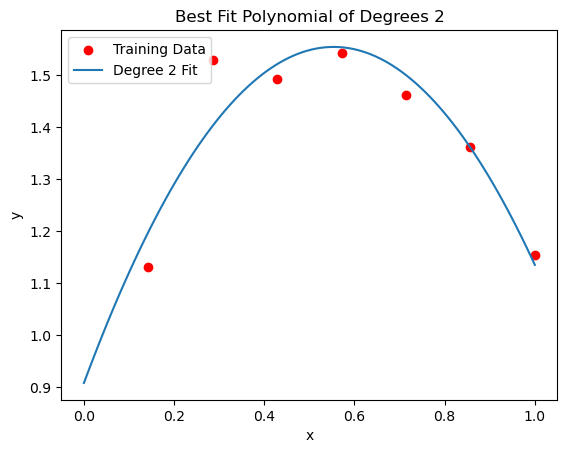

In [3]:
noise = np.random.normal(0,1,7)
X, Y, F = [], [], []
for i in range(7):
    x = (i+1)/7
    y = f(x)
    X.append(x)
    F.append(y)
    Y.append(y + 0.1*noise[i])

plt.figure()
plt.scatter(X, Y, label='Training Data', color='red')
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y, label='True Function', linestyle='--', color='blue')
plt.title("Training data & function f")
plt.xlabel("X")
plt.ylabel("Y")

d = 2

degrees = np.arange(7)
MSE, MSE_test = [], []
X_copy = X
x_test, y_test, f_test = [], [], []
noise = np.random.normal(0, 1, 1000) # guassian noise - mean 0, standard deviation 1. I am sampling 1000 points from this distribution.
for idx in range(1000):
    xVal = (idx+1)/1000
    fVal = f(xVal)
    yVal = fVal + 0.1*noise[idx]
    x_test.append(xVal)
    y_test.append(yVal)

# Solve for our parameters.
X = np.vander(X_copy, d+1, increasing=True)
# print(X)
theta = np.linalg.solve(X.T @ X, X.T @ Y) # Yup, thats it :)
y_fit = np.polyval(np.flip(theta), x)

plt.figure()
plt.scatter(X_copy, Y, label='Training Data', color='red')
plt.plot(x, y_fit, label=f'Degree {d} Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Polynomial of Degrees ' + str(d))
plt.legend()

## Homework: Can you figure out what np.polyval and np.vander is doing here?

### But we are computer scientits destined to learn gradient descent!

We will walk through each step one by one and plot our results.

In [ ]:
# Compute Loss (mean squared error)
def compute_Loss(X, y, theta):
    m = len(y)
    predictions = fit(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2) # normalized MSE. 

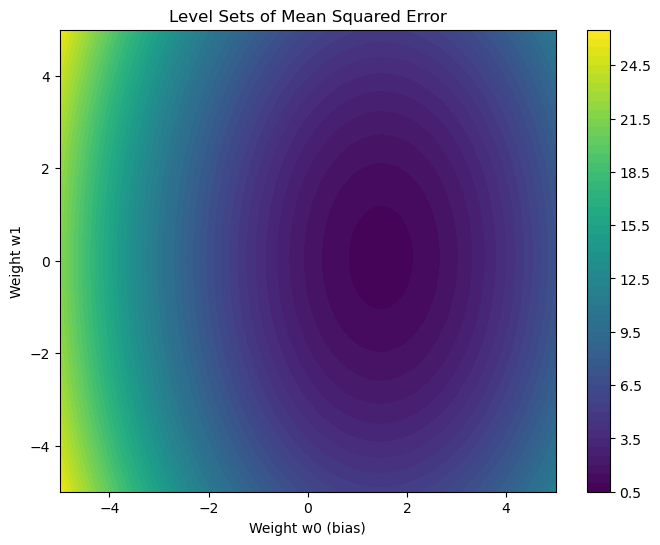

In [22]:
## LEVEL SETS.

## Before we start gradient descent. Lets see what our 
def generate_data(n_samples=100):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1) - 1  # Random values between -1 and 1
    y = 1 - 2 * X + X**2  # True function: f(x) = 1 - 2x + x^2
    y = y.ravel()  # Flatten y to 1D
    return X, y

X, y = generate_data(n_samples=100)

w0_range = np.linspace(-5, 5, 100)
w1_range = np.linspace(-5, 5, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
ax = fig.add_subplot(111, projection='3d')
# Calculate MSE for each combination of w0 and w1
Z = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_temp = np.array([W0[i, j], W1[i, j]])  # Combination of w0 and w1
        Z[i, j] = compute_Loss(X_bias, y, w_temp)

# Plot the contour plot (level sets of MSE)
plt.figure(figsize=(8, 6))
contour = plt.contourf(W0, W1, Z, levels=50)
plt.colorbar(contour)
plt.xlabel('Weight w0 (bias)')
plt.ylabel('Weight w1')
plt.title('Level Sets of Mean Squared Error')
plt.show()

plt.show() 

[[ 1.         -0.47275853]
 [ 1.         -0.39813369]
 [ 1.          0.20989398]
 [ 1.          0.3603475 ]
 [ 1.          0.51644989]
 [ 1.         -0.31154739]
 [ 1.          0.71197792]
 [ 1.         -0.01050002]
 [ 1.         -0.02487419]
 [ 1.          0.47354018]
 [ 1.         -0.68733459]
 [ 1.         -0.18170149]
 [ 1.          0.75983173]
 [ 1.         -0.40845617]
 [ 1.          0.17132038]
 [ 1.          0.5714214 ]
 [ 1.          0.06116991]
 [ 1.          0.77865646]
 [ 1.          0.56726745]
 [ 1.         -0.2325284 ]
 [ 1.         -0.97422487]
 [ 1.          0.81235355]
 [ 1.         -0.7321773 ]
 [ 1.         -0.44463312]
 [ 1.          0.57519715]
 [ 1.          0.53637249]
 [ 1.          0.34108287]
 [ 1.         -0.30272128]
 [ 1.          0.7667053 ]
 [ 1.          0.06490701]
 [ 1.          0.49609867]
 [ 1.         -0.43783684]
 [ 1.          0.85805477]
 [ 1.         -0.68113329]
 [ 1.         -0.91820657]
 [ 1.          0.83959447]
 [ 1.         -0.54169029]
 

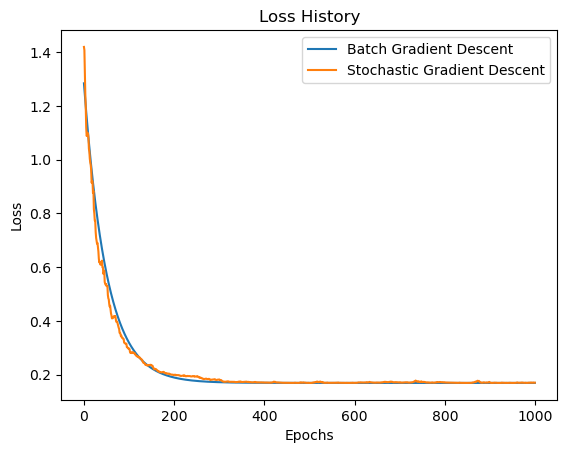

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def f(X, n_samples=100):
    np.random.seed(42)
    y = 1 + 2 * X  # f(x) = 1 + 2x (True function)
    y = y.ravel()  # Flatten y to 1D
    return y

def fit(X, theta):
    return np.dot(X, theta)

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])  # Initialize random parameters
    Loss_history = []

    for epoch in range(epochs):
        gradients = (1 / m) * np.dot(X.T, fit(X, theta) - y)  # Gradient
        theta -= learning_rate * gradients  # Update parameters
        Loss = compute_Loss(X, y, theta)
        Loss_history.append(Loss)

    return theta, Loss_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=1000, batch_size = 1):
    m = len(y)
    theta = np.random.randn(X.shape[1])  # Initialize random values
    Loss_history = []

    for epoch in range(epochs):
        for i in range(batch_size):
            random_idx = np.random.randint(m)
            xi = X[random_idx:random_idx + 1]  # Select one sample
            yi = y[random_idx:random_idx + 1]
            gradients = 2 * xi.T.dot(fit(xi, theta) - yi)  # Gradient for one sample
            theta -= learning_rate * gradients  # Update parameters
        Loss = compute_Loss(X, y, theta)
        Loss_history.append(Loss)

    return theta, Loss_history

# Main
X = 2 * np.random.rand(100, 1) - 1  # 100 samples of random values between -1 and 1
y = f(x, n_samples=100)
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X)
print(y)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Batch Gradient Descent
theta_batch, Loss_history_batch = batch_gradient_descent(X, y, learning_rate, epochs)
print("Curve parameters (Batch GD):", theta_batch)

# Stochastic Gradient Descent
theta_sgd, Loss_history_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)
print("Curve parameters (SGD):", theta_sgd)

# Plot Loss history for both methods
plt.plot(Loss_history_batch, label='Batch Gradient Descent')
plt.plot(Loss_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()


In [ ]:
# add mre fig to plot the convergence onto the contour plot